In [1]:
import os
import warnings

try:
    from ee23b135_kbda import KeyboardAnalyzer
    from ee23b135_layout import Layout

except ImportError as import_error:
    # Just in case the person using this didn't read the readme
    warnings.warn("Did you forget to place `ee23b135_kbda.py` and `ee23b135_layout` in the current directory?", stacklevel=2)
    raise import_error


In [3]:
SHOW_IMAGE = True
"""Set to true to show the heatmaps on generation (using `PIL.Image.Image.show`)"""

SAVE_IMAGE = False
"""Set to true to save the heatmaps generated"""

IMAGE_OUTPUT_DIRECTORY = "ee23b135_heatmaps"
"""The directory where heatmaps will be saved to (If `SAVE_IMAGE` is set to True)"""

IMAGE_OUTPUT_PREFIX = "ee23b135_heatmap"
"""The name with which heatmaps will be saved with (If `SAVE_IMAGE` is set to True)"""

'The name with which heatmaps will be saved with (If `SAVE_IMAGE` is set to True)'

In [8]:
def generate_outfile_name():
    """
    Generates file names of the type
    `{IMAGE_OUTPUT_DIRECTORY}/{IMAGE_OUTPUT_PREFIX}{NUMBER}.png`
    Where NUMEBER is the number of files present in `IMAGE_OUTPUT_DIRECTORY`
    
    (This is done in an effort to create unique file names that follow some order)

    Returns
    -------
    file_path: str
        A (hopefully unique) file path to save the image as :)
    """
    # Make the directory if it doesn't exist
    os.makedirs(IMAGE_OUTPUT_DIRECTORY, exist_ok=True)

    # Find the number of items in the directory
    number = len(os.listdir(IMAGE_OUTPUT_DIRECTORY))

    return f"{IMAGE_OUTPUT_DIRECTORY}/{IMAGE_OUTPUT_PREFIX}{number}.png"

def run_analysis(kbda: KeyboardAnalyzer):
    while True:
        text = input("Enter text to analyze (Give empty string to exit): ")
        if not text:
            break

        # Analyze the text and generate the heatmap
        kbda.analyze(text)
        heatmap = kbda.generate_heatmap()

        print("Distance travelled:", kbda.get_distance_travelled())

        if SAVE_IMAGE:
            outfile = generate_outfile_name()
            print(f"Saving heatmap to `{outfile}`")
            heatmap.save(outfile)

        if SHOW_IMAGE:
            print("Showing heatmap...")
            display(heatmap)

        # Analyzing the text changes the state of the kbda,
        # Reset it in order to analyze new set of text
        kbda.reset()


Distance travelled: 1955.4480964679683
Showing heatmap...


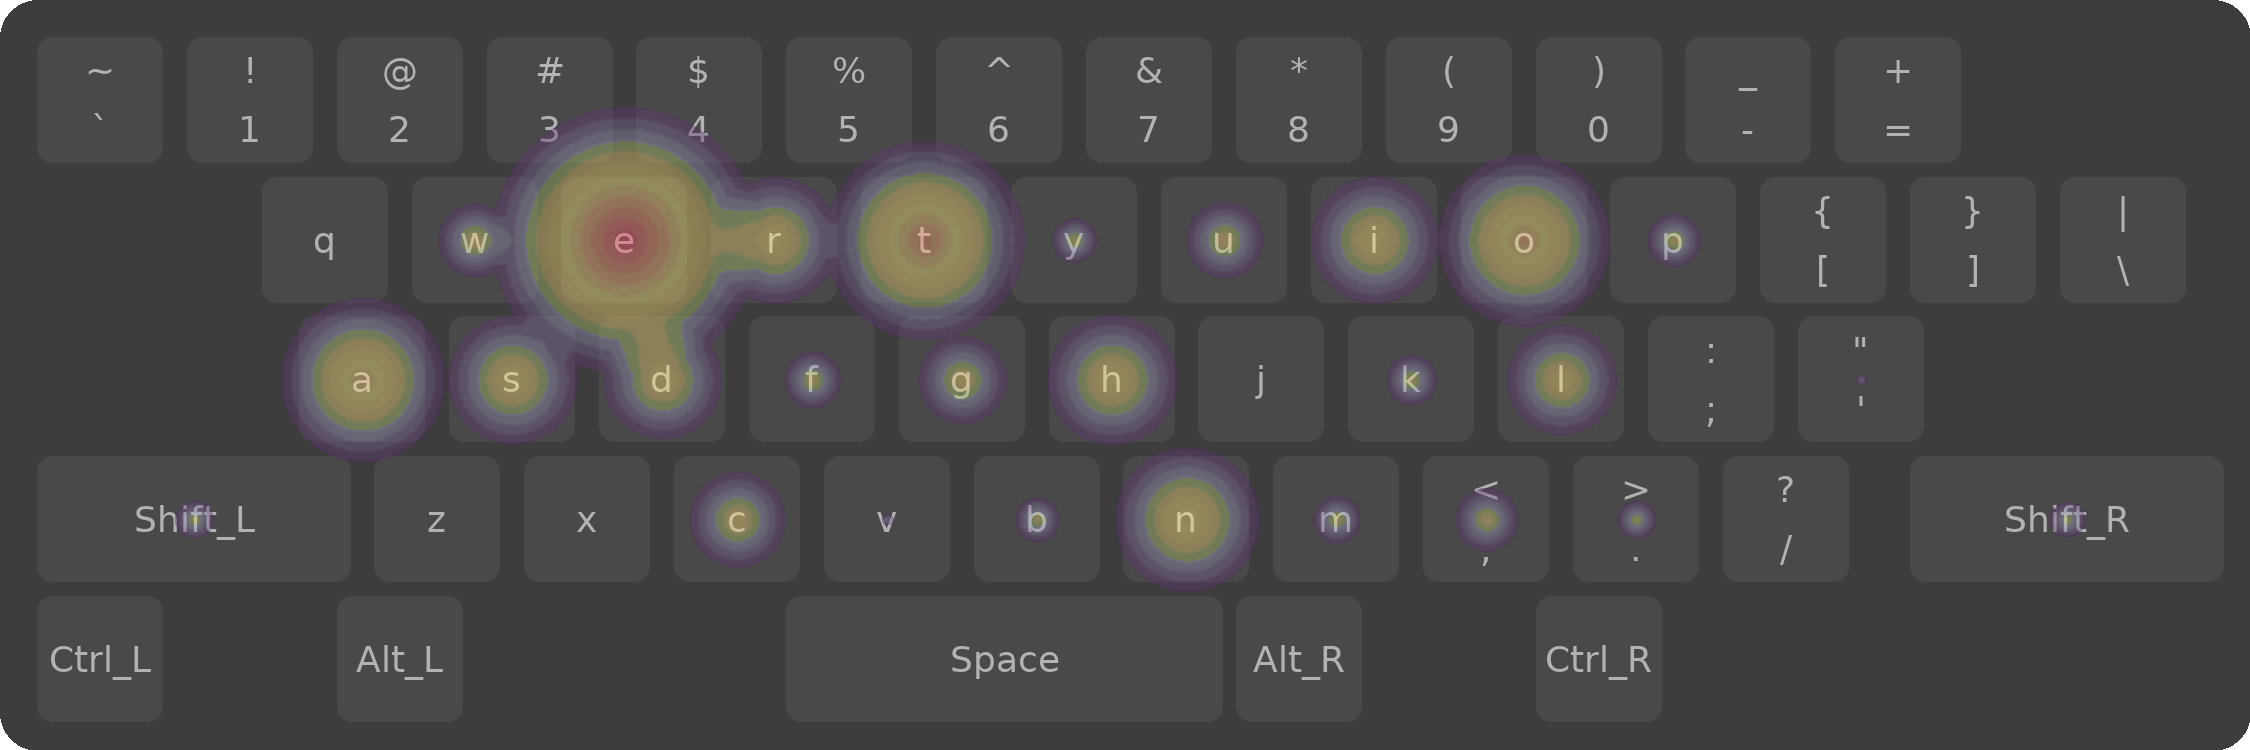

Distance travelled: 1955.4480964679683
Showing heatmap...


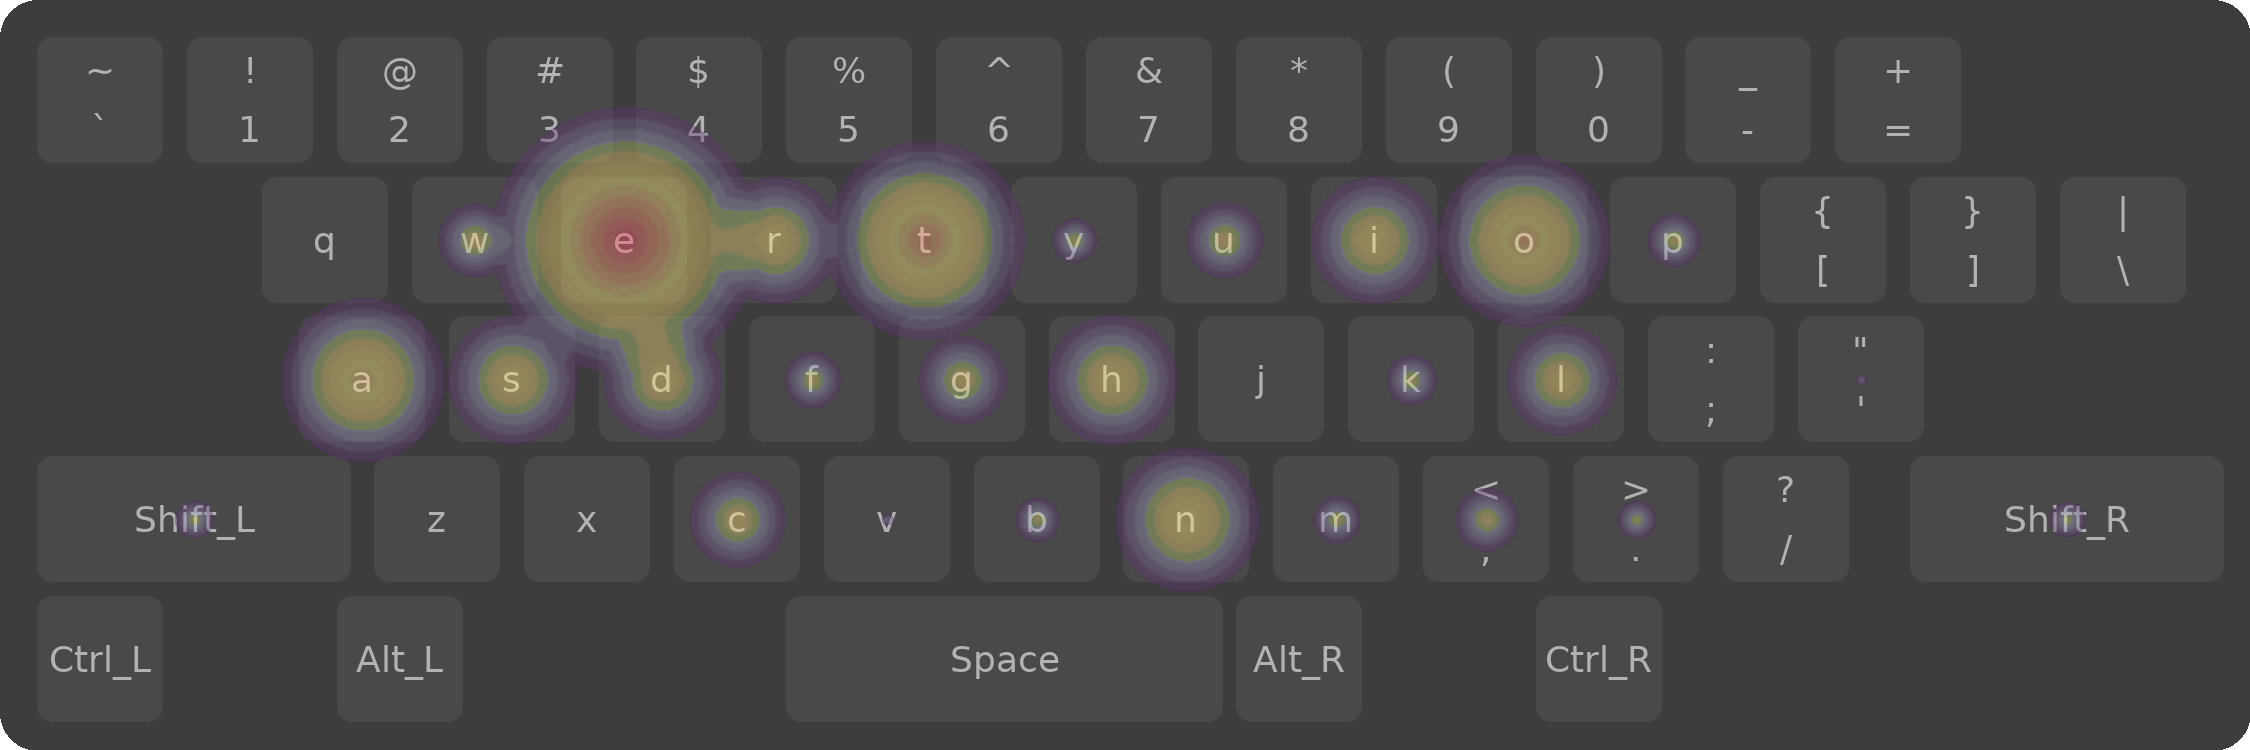

Distance travelled: 1955.4480964679683
Showing heatmap...


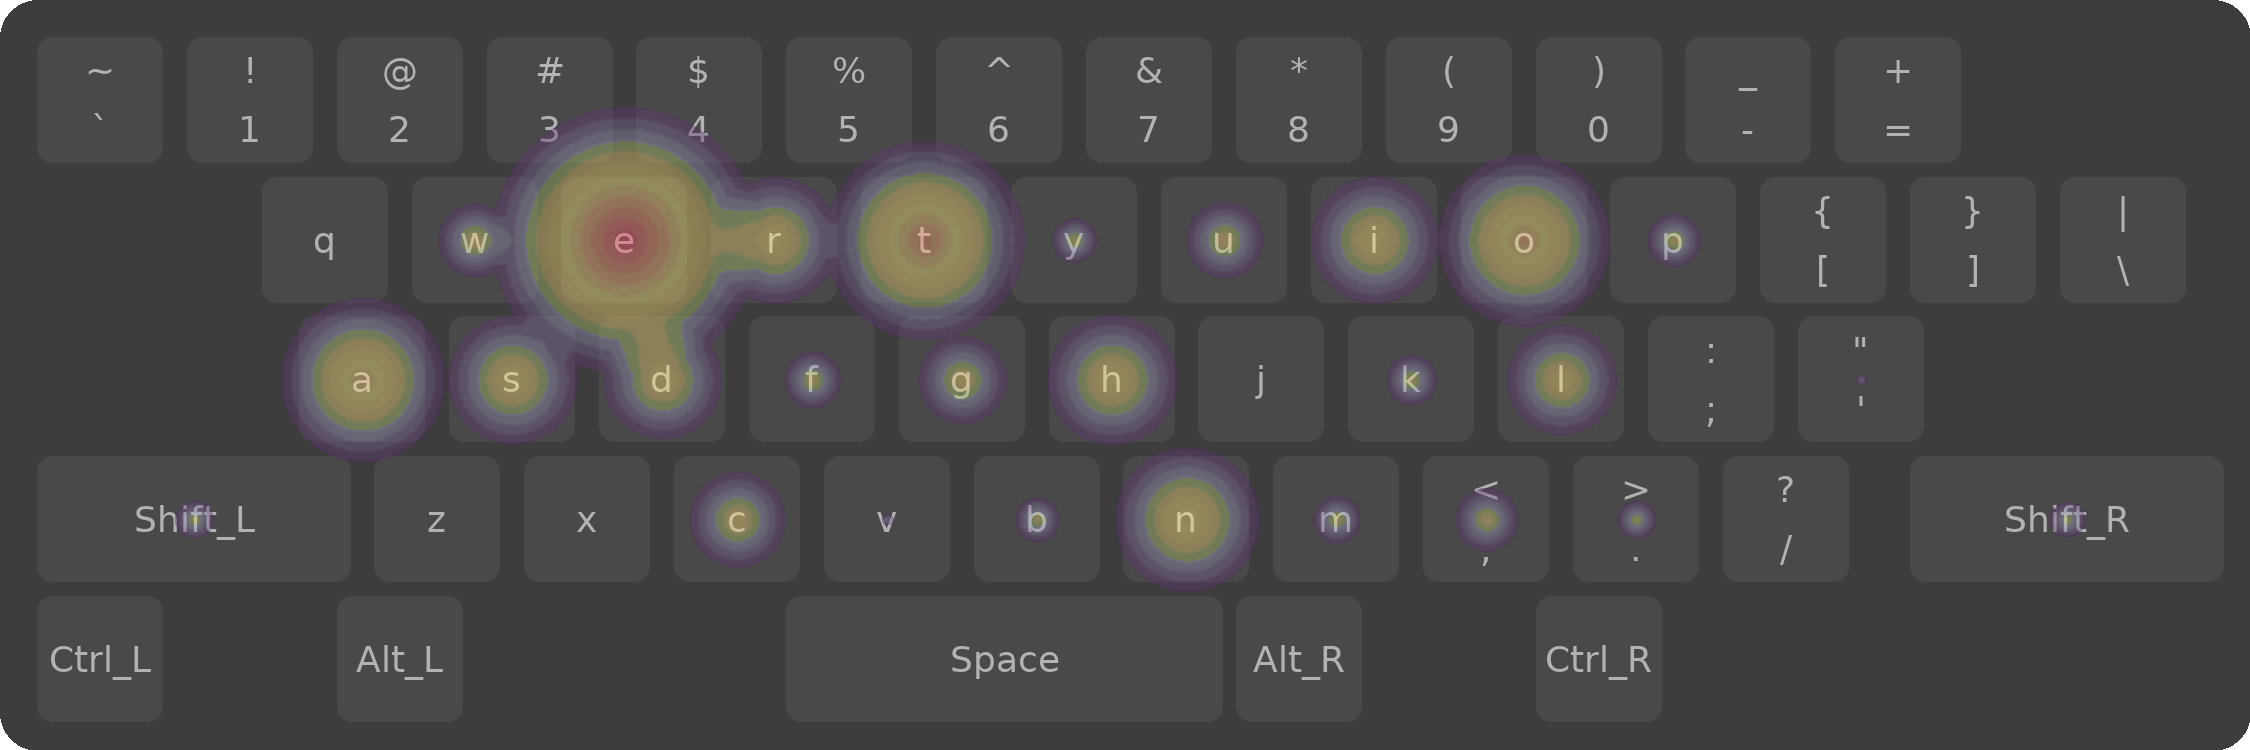

Distance travelled: 1955.4480964679683
Showing heatmap...


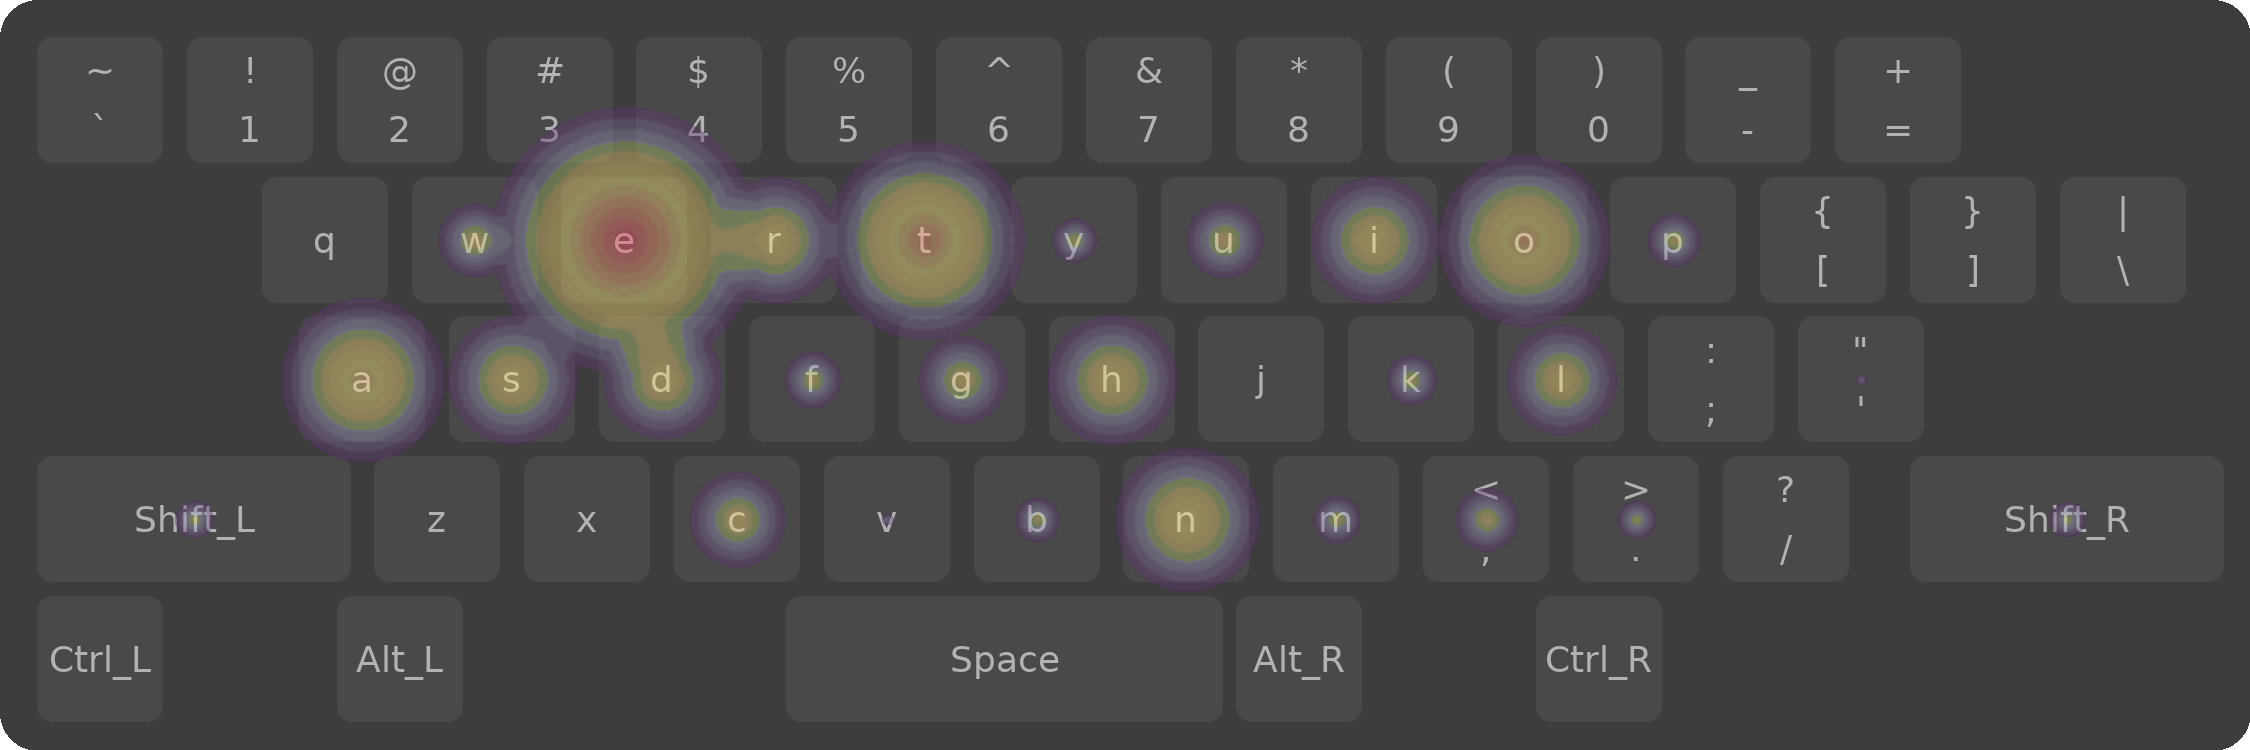

Distance travelled: 1955.4480964679683
Showing heatmap...


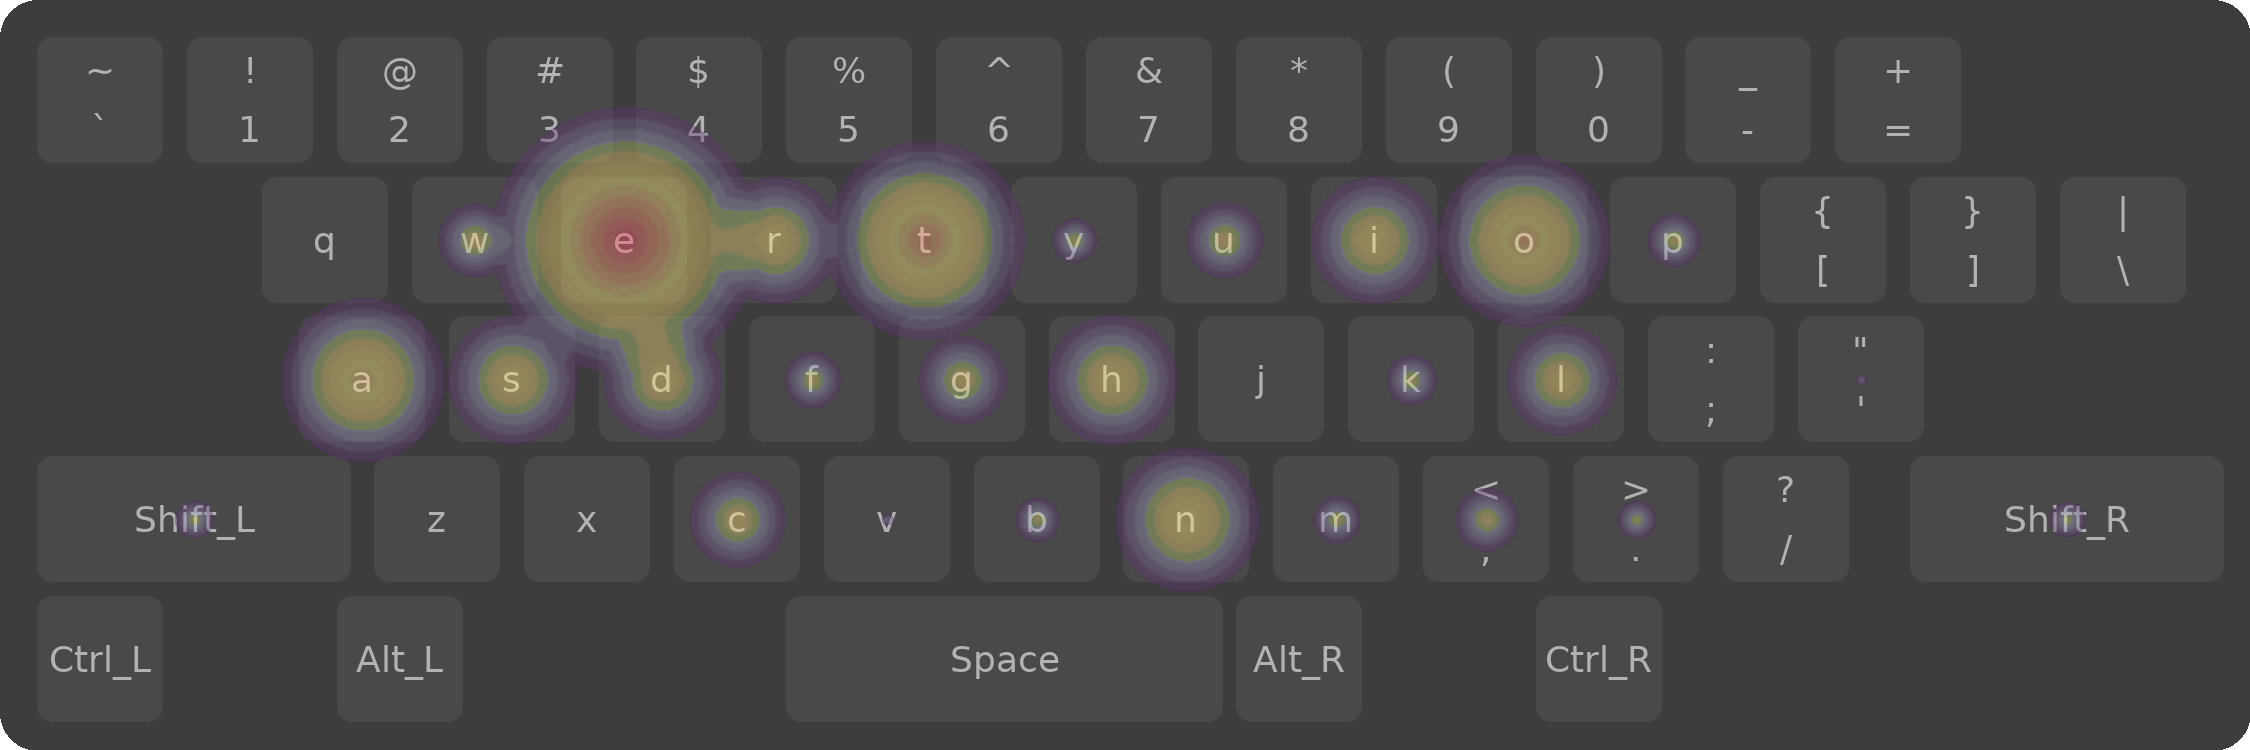

Distance travelled: 1955.4480964679683
Showing heatmap...


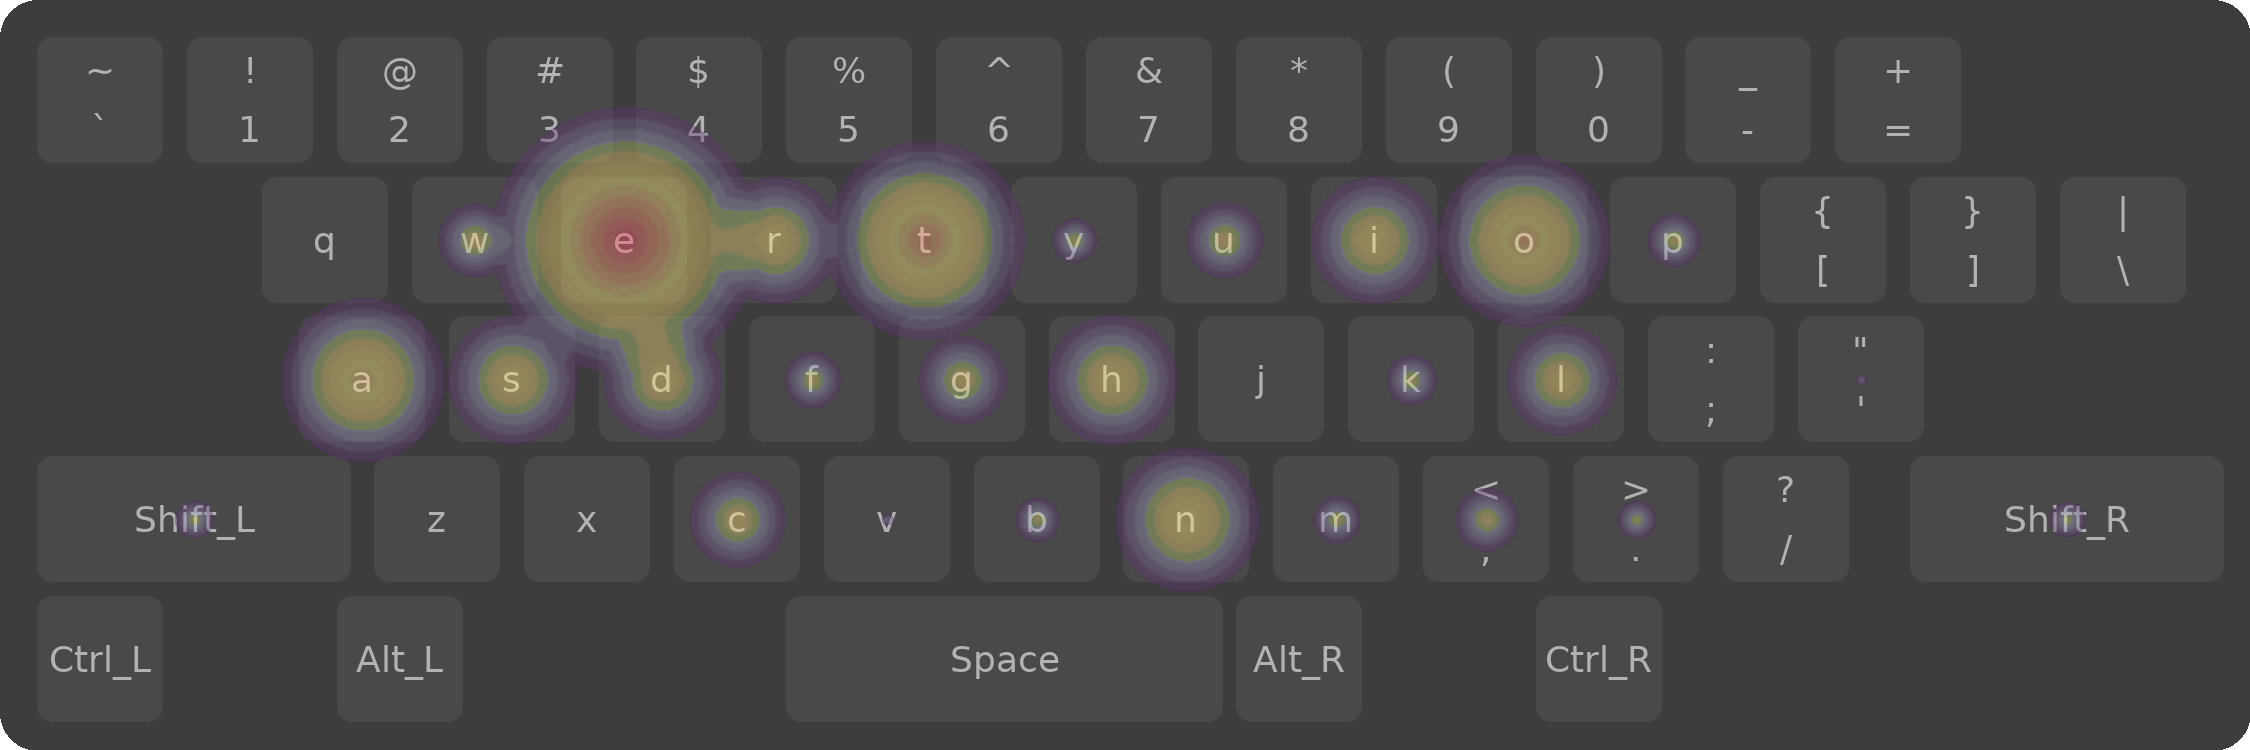

Distance travelled: 1955.4480964679683
Showing heatmap...


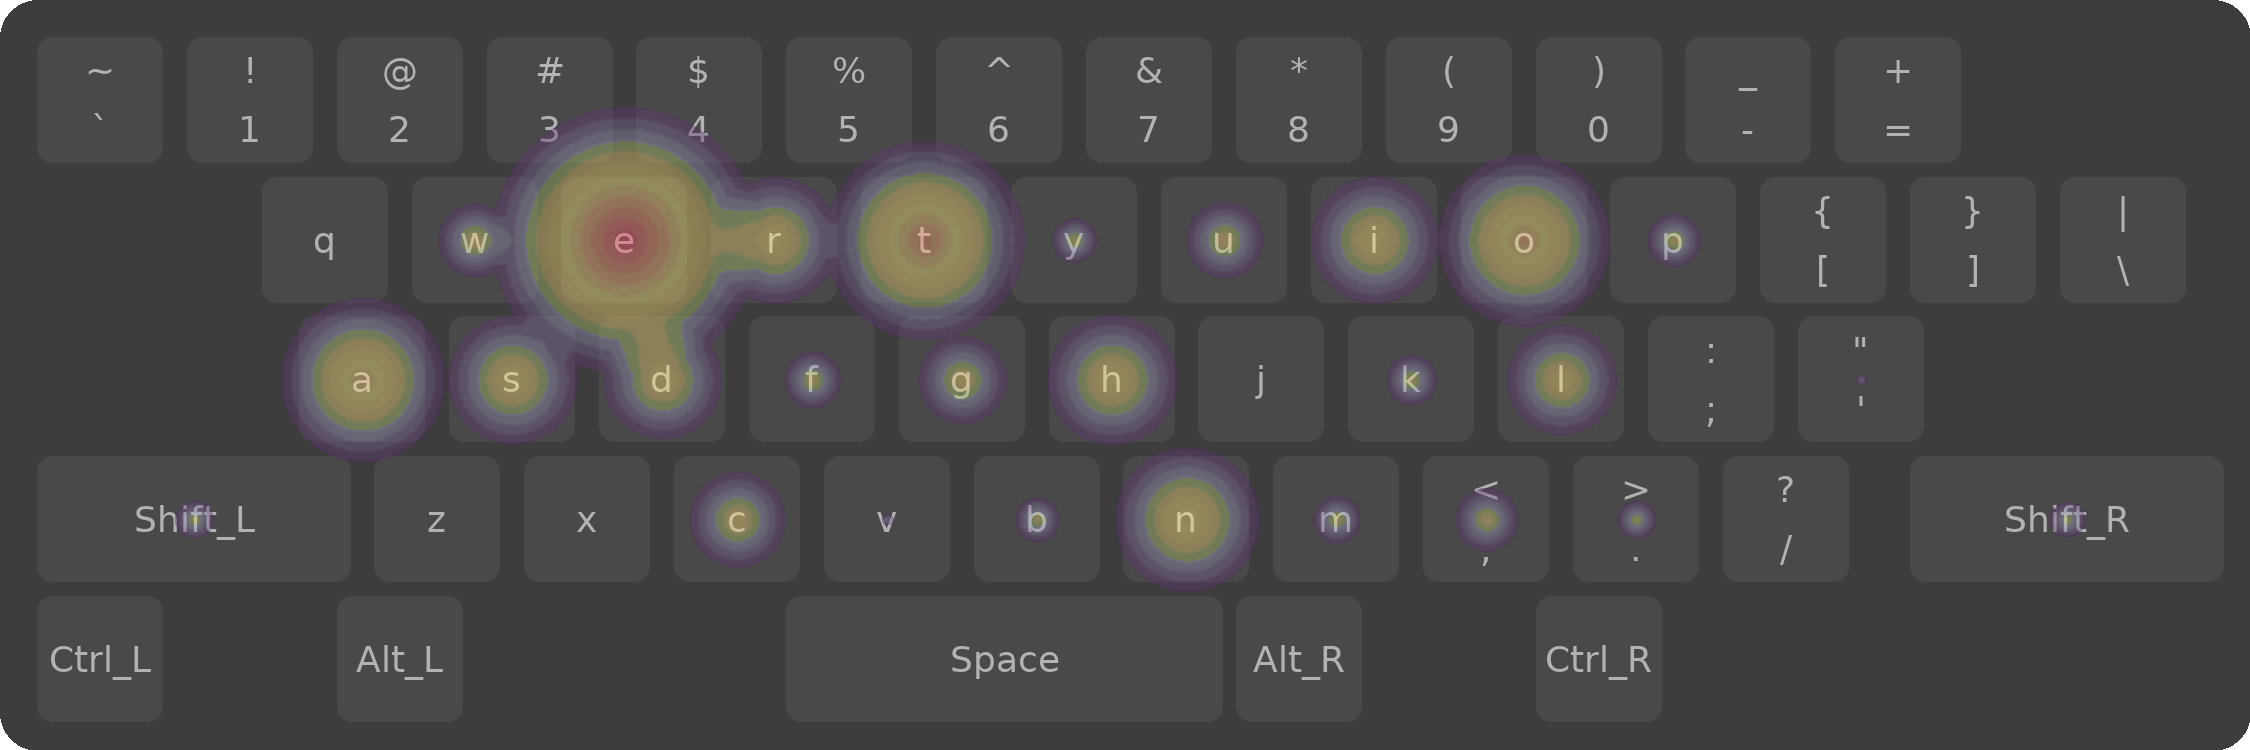

Distance travelled: 1955.4480964679683
Showing heatmap...


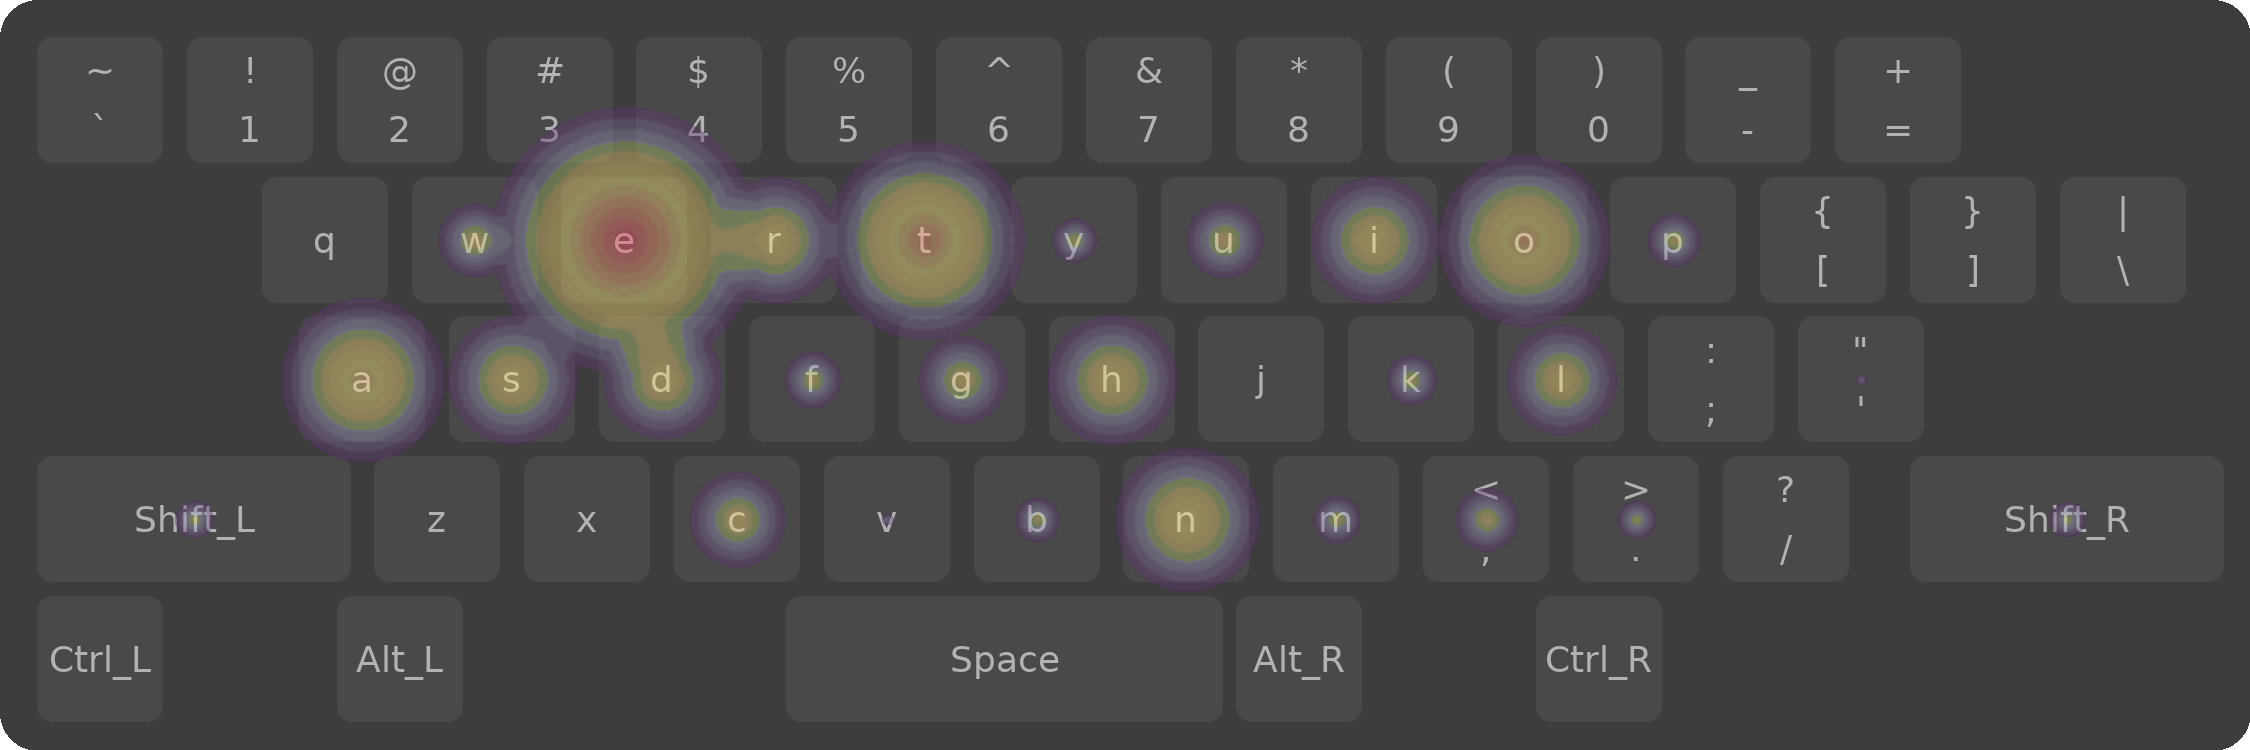

Distance travelled: 1955.4480964679683
Showing heatmap...


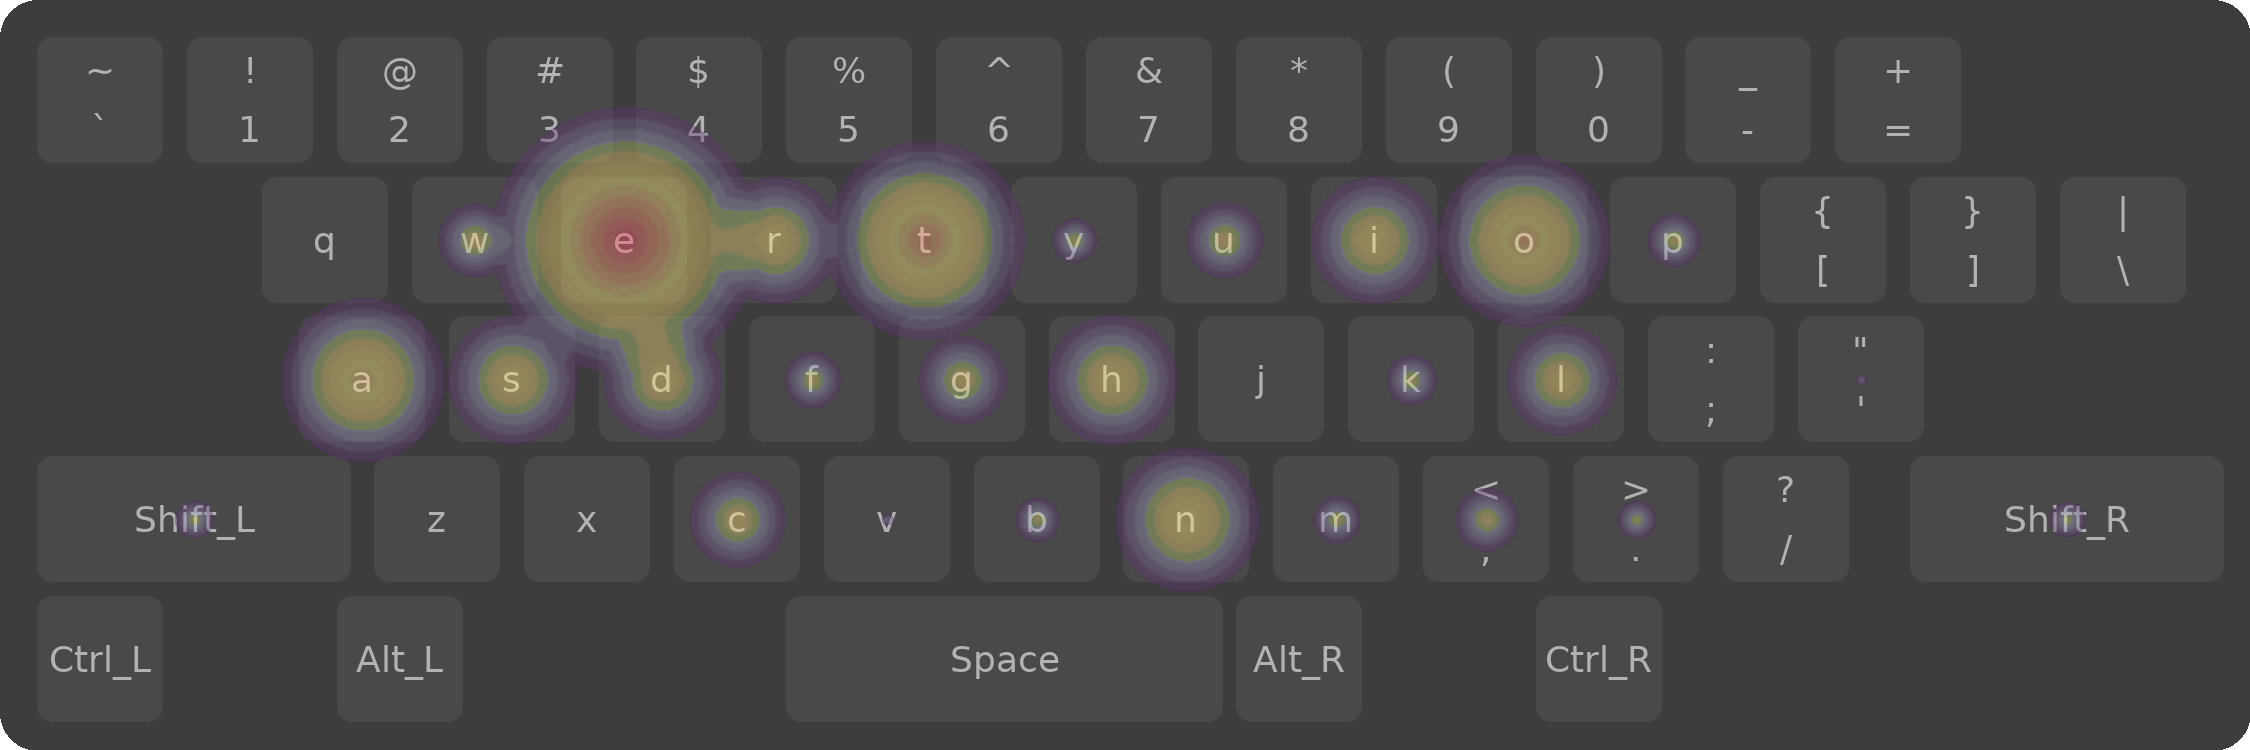

Distance travelled: 1955.4480964679683
Showing heatmap...


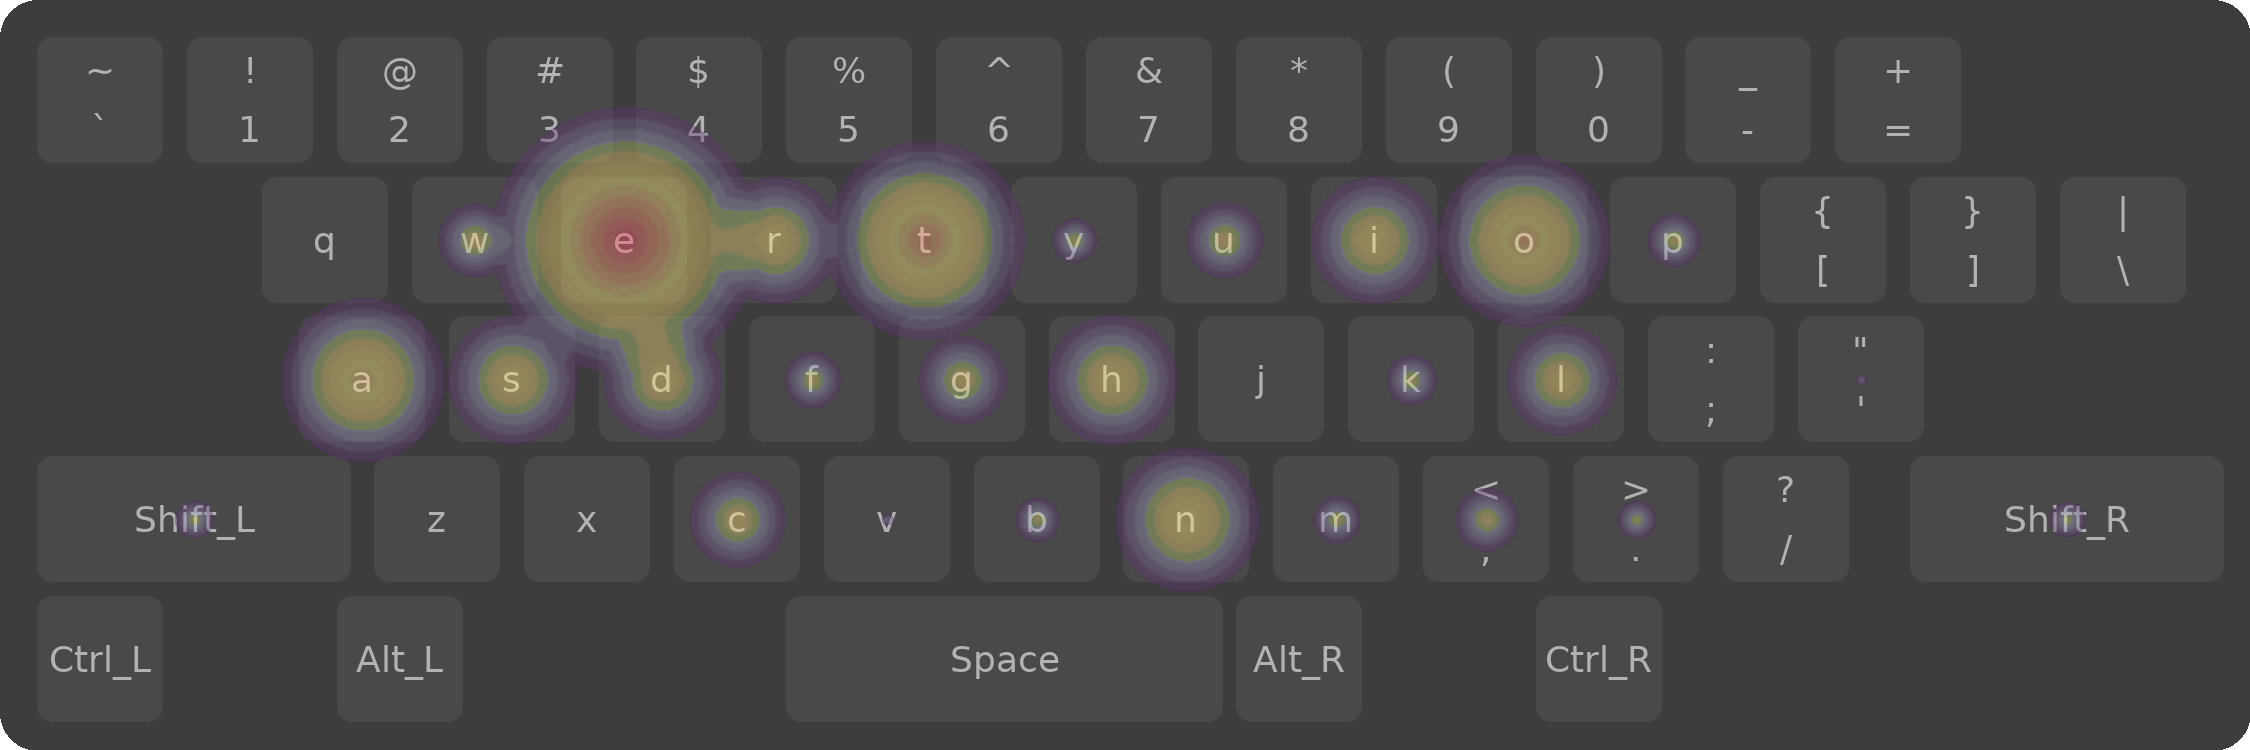

KeyboardInterrupt: 

In [9]:
file_path = input("Enter a json file with the keyboard layout: ")

# Load the layout and create the analyzer
kbda = KeyboardAnalyzer(Layout.from_file(file_path))

# Keep taking text input to analyze (Stop when the user gives an empty string)
run_analysis(kbda)

Distance travelled: 22.360679774997898
Showing heatmap...


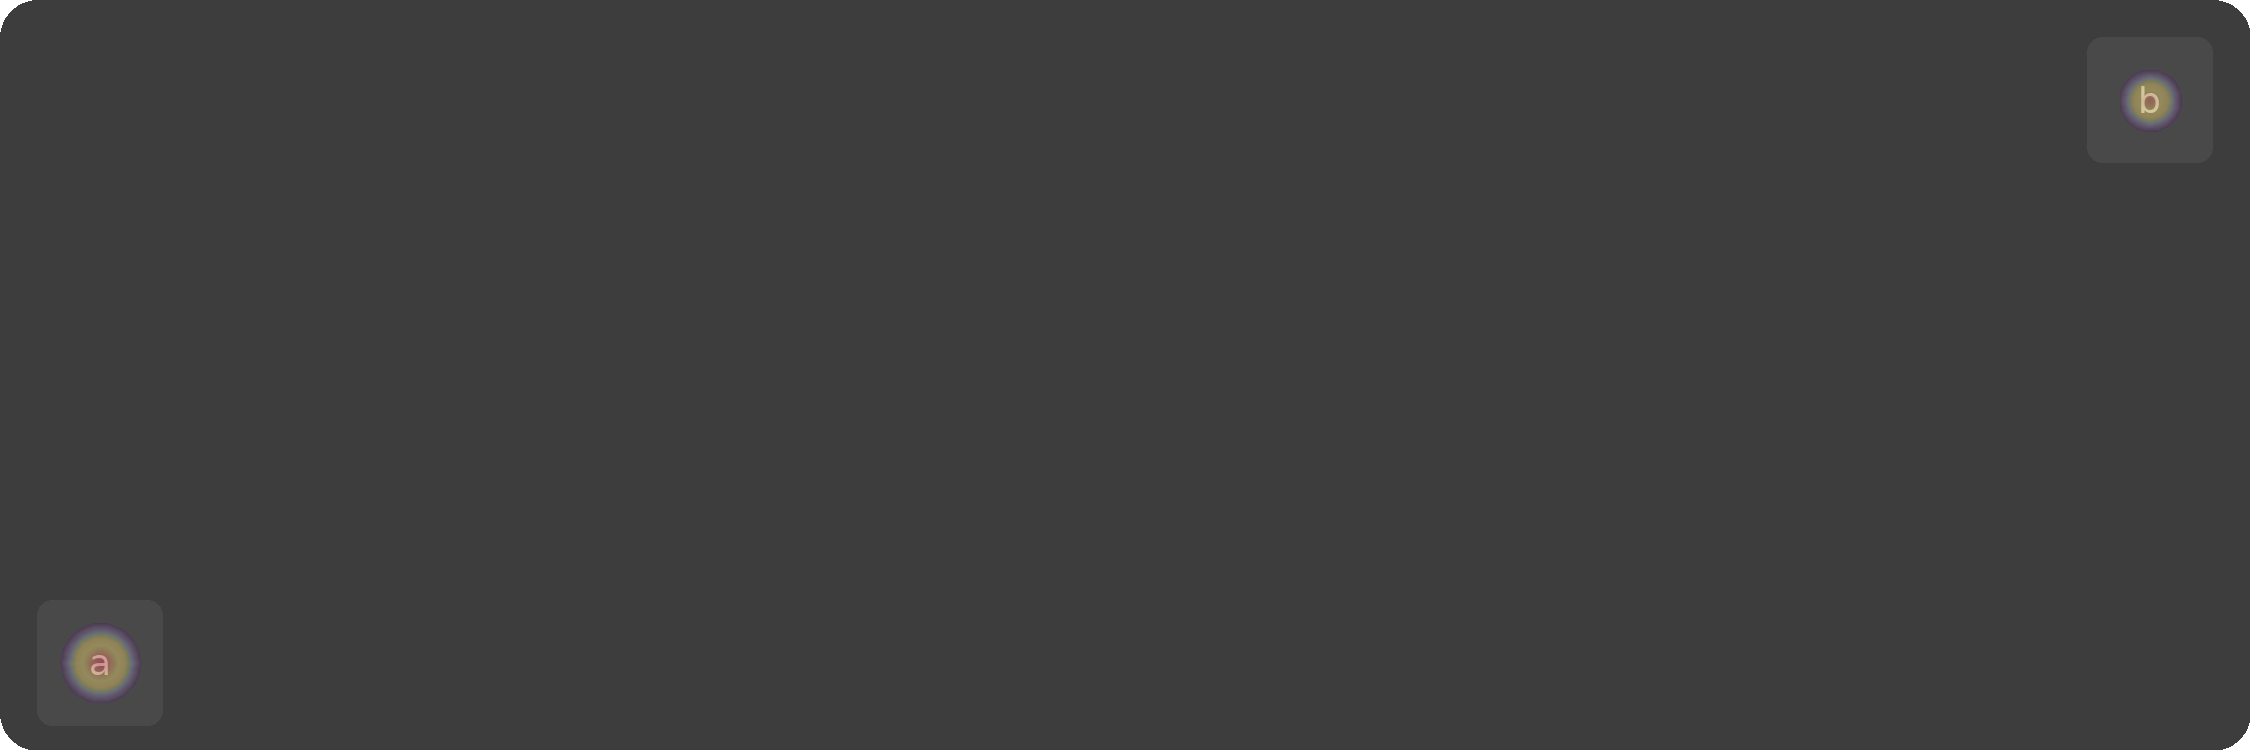

In [6]:
# Load the layout and create the analyzer
kbda = KeyboardAnalyzer(Layout.from_dict(
    keys={
        'a': {'pos': (0, 0), 'start': 'a'},
        'b': {'pos': (10, 5), 'start': 'a'},
    },
    characters={'a': ['a'], 'b': ['b']}
))

"""
# Alternatively if you define the keys and characters dict in some other python file...
from input_file import keys, characters

kbda = KeyboardAnalyzer(Layout.from_dict(keys=keys, characters=characters))
run_analysis(kbda)
"""

# Keep taking text input to analyze (Stop when the user gives an empty string)
run_analysis(kbda)